In [1]:
# !pip install scikit-optimize
# from google.colab import drive
# drive.mount('/content/drive')
# base_dir='/content/drive/MyDrive/ucd/'
base_dir='../../../folders/'

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from sklearn.feature_selection import RFE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
np.int = np.int_
import warnings
warnings.filterwarnings("ignore")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [3]:
data_base=[f'ucddb{i:003d}' for i in range(2, 29)]
data_base.remove('ucddb004')
data_base.remove('ucddb016')
print(data_base)

['ucddb002', 'ucddb003', 'ucddb005', 'ucddb006', 'ucddb007', 'ucddb008', 'ucddb009', 'ucddb010', 'ucddb011', 'ucddb012', 'ucddb013', 'ucddb014', 'ucddb015', 'ucddb017', 'ucddb018', 'ucddb019', 'ucddb020', 'ucddb021', 'ucddb022', 'ucddb023', 'ucddb024', 'ucddb025', 'ucddb026', 'ucddb027', 'ucddb028']


In [4]:
# df = pd.DataFrame()
# for file in data_base:
#     i=pd.read_csv(base_dir+f'feature/{file}_win.csv')
#     df = pd.concat([df, i], ignore_index=True)
# df.dropna(how='all', axis=1,inplace=True)
# df.to_csv(base_dir+f'all/all_win.csv', index=False)

In [5]:
data_set = pd.read_csv(base_dir+f'all/all_win.csv')
data_set = data_set.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
data_set

,HRV_MeanNN_x,HRV_SDNN_x,HRV_RMSSD_x,HRV_SDSD_x,HRV_CVNN_x,HRV_CVSD_x,HRV_MedianNN_x,HRV_MadNN_x,HRV_MCVNN_x,HRV_IQRNN_x,...,peak_to_peak_y,rmse_y,kurtosis_y,skewness_y,waveform_factor_y,peak_factor_y,impulse_factor_y,margin_factor_y,rms_y,anns
0,941.406250,13.877191,10.461470,10.590011,0.014741,0.011113,937.50000,11.582812,0.012355,23.437500,...,3.426618,0.499383,3.728094,-0.717594,0.220546,6.861699,1.513324,2.803092,2.316825,0
1,932.963710,19.740977,10.578175,10.598053,0.021159,0.011338,937.50000,11.582812,0.012355,15.625000,...,3.426618,0.510929,3.205934,-0.847646,0.219974,6.706639,1.475284,2.785778,2.378262,0
2,784.417230,84.031488,92.695165,94.005934,0.107126,0.118171,773.43750,57.914062,0.074879,93.750000,...,3.426618,0.512045,3.090319,-1.034765,0.213657,6.692021,1.429797,2.764269,2.453831,0
3,915.826613,27.783640,20.768127,21.063296,0.030337,0.022677,914.06250,23.165625,0.025344,27.343750,...,3.409035,0.460080,3.062617,-0.937992,0.185486,7.409661,1.374385,2.723429,2.526806,0
4,851.562500,115.654429,69.943265,71.024059,0.135814,0.082135,878.90625,98.453906,0.112019,146.484375,...,3.409035,0.469791,4.127472,-1.289496,0.184498,7.256494,1.338809,2.705254,2.589996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20399,803.819444,42.248541,22.410536,22.369303,0.052560,0.027880,808.59375,28.957031,0.035812,33.203125,...,0.238339,0.114037,-1.477381,0.240137,0.037104,2.090020,0.077549,0.180015,3.074504,0
20400,740.985577,57.787447,17.377094,17.605423,0.077987,0.023451,734.37500,69.496875,0.094634,85.937500,...,0.238339,0.114434,-1.474395,0.259257,0.037259,2.082769,0.077601,0.180046,3.072412,0
20401,805.555556,13.043136,11.587810,11.754803,0.016191,0.014385,804.68750,11.582812,0.014394,15.625000,...,0.236386,0.113433,-1.441417,0.320433,0.036976,2.083932,0.077055,0.178622,3.068847,0
20402,808.159722,16.004808,10.889563,11.048543,0.019804,0.013475,812.50000,23.165625,0.028512,23.437500,...,0.236386,0.112289,-1.428370,0.317029,0.036602,2.105157,0.077054,0.178621,3.068897,2


In [6]:
# Assuming your target variable is named 'target'
x = data_set.drop('anns', axis=1)  # Features
y = data_set['anns']  # Target variable

# Create the estimator (in this case, LogisticRegression)
estimator = RandomForestClassifier()

# Create the RFE object
rfe = RFE(estimator, n_features_to_select=30, step=3, verbose=10)

# Fit the RFE object to the data
rfe.fit(x, y)

# Get the column names of the selected features
selected_features = x.columns[rfe.support_]

# Create a new DataFrame with the selected features
x = data_set[selected_features]

Fitting estimator with 187 features.
Fitting estimator with 184 features.
Fitting estimator with 181 features.
Fitting estimator with 178 features.
Fitting estimator with 175 features.
Fitting estimator with 172 features.
Fitting estimator with 169 features.
Fitting estimator with 166 features.
Fitting estimator with 163 features.
Fitting estimator with 160 features.
Fitting estimator with 157 features.
Fitting estimator with 154 features.
Fitting estimator with 151 features.
Fitting estimator with 148 features.
Fitting estimator with 145 features.
Fitting estimator with 142 features.
Fitting estimator with 139 features.
Fitting estimator with 136 features.
Fitting estimator with 133 features.
Fitting estimator with 130 features.
Fitting estimator with 127 features.
Fitting estimator with 124 features.
Fitting estimator with 121 features.
Fitting estimator with 118 features.
Fitting estimator with 115 features.
Fitting estimator with 112 features.
Fitting estimator with 109 features.
F

In [7]:
x

,HRV_MeanNN_x,HRV_Prc20NN_x,HRV_MeanNN_y,HRV_SDANN1_y,HRV_CVSD_y,HRV_MCVNN_y,HRV_pNN20_y,HRV_MinNN_y,HRV_MaxNN_y,HRV_SD1SD2_y,...,mean_y,std_y,var_y,rmse_y,kurtosis_y,skewness_y,waveform_factor_y,peak_factor_y,margin_factor_y,rms_y
0,941.406250,929.6875,887.054896,55.045392,0.111944,0.062822,32.937685,304.6875,1656.2500,0.468204,...,2.264299,0.490537,0.240627,0.499383,3.728094,-0.717594,0.220546,6.861699,2.803092,2.316825
1,932.963710,929.6875,890.181903,34.516891,0.112334,0.062822,35.223881,304.6875,1656.2500,0.467034,...,2.322683,0.511149,0.261274,0.510929,3.205934,-0.847646,0.219974,6.706639,2.785778,2.378262
2,784.417230,750.0000,893.314933,59.306612,0.112102,0.062294,35.928144,304.6875,1656.2500,0.459784,...,2.396577,0.526978,0.277706,0.512045,3.090319,-1.034765,0.213657,6.692021,2.764269,2.453831
3,915.826613,898.4375,911.847370,38.943009,0.105690,0.049420,32.926829,304.6875,1656.2500,0.475065,...,2.480407,0.482002,0.232326,0.460080,3.062617,-0.937992,0.185486,7.409661,2.723429,2.526806
4,851.562500,789.0625,913.560780,54.877815,0.105679,0.036759,32.110092,304.6875,1656.2500,0.473701,...,2.546320,0.473641,0.224336,0.469791,4.127472,-1.289496,0.184498,7.256494,2.705254,2.589996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20399,803.819444,789.0625,793.849469,14.224312,0.020415,0.029071,12.466844,632.8125,882.8125,0.234756,...,3.073420,0.081616,0.006661,0.114037,-1.477381,0.240137,0.037104,2.090020,0.180015,3.074504
20400,740.985577,692.1875,794.921875,16.700587,0.019212,0.028788,12.500000,632.8125,882.8125,0.228074,...,3.071327,0.081651,0.006667,0.114434,-1.474395,0.259257,0.037259,2.082769,0.180046,3.072412
20401,805.555556,796.8750,800.289042,6.541426,0.018375,0.028788,10.723861,726.5625,882.8125,0.336018,...,3.067751,0.082016,0.006727,0.113433,-1.441417,0.320433,0.036976,2.083932,0.178622,3.068847
20402,808.159722,796.8750,793.662964,18.535262,0.018353,0.029071,10.344828,679.6875,882.8125,0.249087,...,3.067813,0.081559,0.006652,0.112289,-1.428370,0.317029,0.036602,2.105157,0.178621,3.068897


Class=0, n=4405 (21.589%)
Class=2, n=10347 (50.711%)
Class=3, n=2661 (13.042%)
Class=1, n=2991 (14.659%)


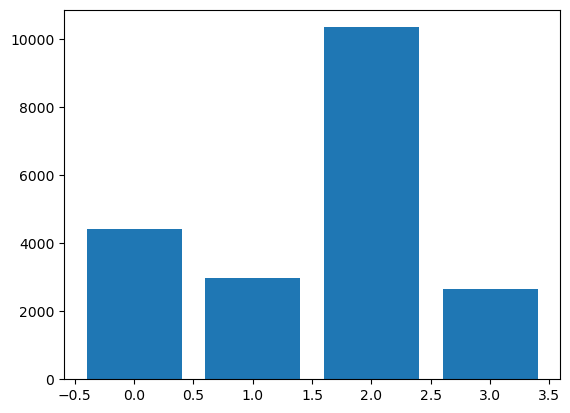

In [8]:
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [9]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,stratify=y,random_state=1)

In [10]:
# model = LogisticRegression()
# model.fit(x_train, y_train)
# y_pred= model.predict(x_test)
# print(classification_report(y_test,y_pred,target_names=['WAKE','REM','LIGHT','DEEP']))

In [11]:
m = LogisticRegression()
pipe = Pipeline(steps=[('std_slc', StandardScaler()), ('m', m)])
pipe.get_params().keys()
param_grid = {
    'm__solver': ['liblinear', 'saga'],  
    'm__penalty': ['l1','l2'],
    'm__tol': [1e-4, 1e-3, 1e-2],
    'm__C': [ 0.01, 0.1, 1, 10],
    # 'm__max_iter': [100, 200, 300],
            
}
clf = BayesSearchCV(pipe, param_grid,n_iter=50,cv=5,verbose=3,n_jobs=-1,refit=True,scoring='f1_macro')
clf.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END m__C=10, m__penalty=l2, m__solver=liblinear, m__tol=0.001;, score=0.479 total time=   0.5s
[CV 1/5] END m__C=10, m__penalty=l2, m__solver=liblinear, m__tol=0.001;, score=0.471 total time=   0.9s
[CV 3/5] END m__C=10, m__penalty=l2, m__solver=liblinear, m__tol=0.001;, score=0.469 total time=   1.0s
[CV 5/5] END m__C=10, m__penalty=l2, m__solver=liblinear, m__tol=0.001;, score=0.484 total time=   0.9s
[CV 2/5] END m__C=10, m__penalty=l2, m__solver=liblinear, m__tol=0.001;, score=0.474 total time=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END m__C=0.1, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.477 total time=   0.8s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END m__C=0.1, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.481 total time=   0.9s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=0.1, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.495 total time=   1.7s
[CV 3/5] END m__C=0.1, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.473 total time=   1.7s
[CV 1/5] END m__C=0.1, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.473 total time=   1.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=0.1, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.495 total time=   1.0s
[CV 4/5] END m__C=0.1, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.477 total time=   1.0s
[CV 2/5] END m__C=0.1, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.481 total time=   1.1s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=0.1, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.473 total time=   1.2s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=0.1, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.473 total time=   2.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.01;, score=0.395 total time=   0.3s
[CV 5/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.01;, score=0.418 total time=   0.4s
[CV 4/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.01;, score=0.407 total time=   0.3s
[CV 2/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.01;, score=0.404 total time=   0.5s
[CV 3/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.01;, score=0.406 total time=   0.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 3/5] END m__C=0.1, m__penalty=l1, m__solver=liblinear, m__tol=0.0001;, score=0.464 total time=   1.3s
[CV 5/5] END m__C=0.1, m__penalty=l1, m__solver=liblinear, m__tol=0.0001;, score=0.475 total time=   1.5s
[CV 4/5] END m__C=0.1, m__penalty=l1, m__solver=liblinear, m__tol=0.0

/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.500 total time=   1.0s
[CV 4/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.489 total time=   1.0s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.478 total time=   1.0s
[CV 1/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.486 total time=   1.0s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.483 total time=   1.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END m__C=1, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.485 total time=   0.2s
[CV 4/5] END m__C=1, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.478 total time=   0.3s
[CV 2/5] END m__C=1, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.474 total time=   0.4s
[CV 1/5] END m__C=1, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.469 total time=   0.4s
[CV 3/5] END m__C=1, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.468 total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END m__C=1, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.482 total time=   0.9s
[CV 3/5] END m__C=1, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.476 total time=   0.9s
[CV 4/5] END m__C=1, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.489 total time=   0.9s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=1, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.485 total time=   1.4s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=1, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.501 total time=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END m__C=1, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.478 total time=   0.3s
[CV 3/5] END m__C=1, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.468 total time=   0.3s
[CV 2/5] END m__C=1, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.474 total time=   0.4s
[CV 1/5] END m__C=1, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.469 total time=   0.5s
[CV 5/5] END m__C=1, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.485 total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.478 total time=   0.3s
[CV 1/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.472 total time=   0.3s
[CV 3/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.01;

/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.478 total time=   0.8s
[CV 2/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.483 total time=   0.8s
[CV 4/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.489 total time=   0.8s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.501 total time=   1.2s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.486 total time=   1.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END m__C=0.01, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.450 total time=   0.1s
[CV 4/5] END m__C=0.01, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.440 total time=   0.1s
[CV 1/5] END m__C=0.01, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.429 total time=   0.3s
[CV 2/5] END m__C=0.01, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.441 total time=   0.3s
[CV 3/5] END m__C=0.01, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.443 total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.475 total time=   0.7s
[CV 4/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.484 total time=   0.7s
[CV 2/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.481 total time=   0.7s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.500 total time=   1.2s
[CV 1/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.480 total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.473 total time=   0.2s
[CV 2/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.476 total time=   0.4s
[CV 5/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.495 total time=   0.4s
[CV 3/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.473 total time=   0.5s
[CV 4/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.478 total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.479 total time=   0.6s
[CV 1/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.486 total time=   0.7s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.489 total time=   0.9s
[CV 2/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.483 total time=   1.0s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.500 total time=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.486 total time=   0.6s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.483 total time=   1.0s
[CV 5/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.500 total time=   1.1s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.479 total time=   1.3s
[CV 4/5] END m__C=10, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.489 total time=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END m__C=0.01, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.465 total time=   0.7s
[CV 3/5] END m__C=0.01, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.467 total time=   0.7s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=0.01, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.453 total time=   1.0s
[CV 5/5] END m__C=0.01, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.478 total time=   1.3s
[CV 2/5] END m__C=0.01, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.459 total time=   1.4s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END m__C=10, m__penalty=l2, m__solver=liblinear, m__tol=0.0001;, score=0.483 total time=   0.4s
[CV 4/5] END m__C=10, m__penalty=l2, m__solver=liblinear, m__tol=0.0001;, score=0.479 total time=   0.7s
[CV 2/5] END m__C=10, m__penalty=l2, m__solver=liblinear, m__tol=0.0001;, score=0.474 total time=   0.9s
[CV 3/5] END m__C=10, m__penalty=l2, m__solver=liblinear, m__tol=0.0001;, score=0.469 total time=   1.1s
[CV 1/5] END m__C=10, m__penalty=l2, m__solver=liblinear, m__tol=0.0001;, score=0.470 total time=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.0001;, score=0.373 total time=   0.1s
[CV 3/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.0001;, score=0.370 total time=   0.1s
[CV 5/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.0001;, score=0.373 total time=   0.2s
[CV 1/5] END m__C=0.01, m__penalty=l

/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.487 total time=   0.8s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.500 total time=   1.1s
[CV 2/5] END m__C=1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.483 total time=   1.3s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.477 total time=   1.4s
[CV 4/5] END m__C=1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.489 total time=   1.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END m__C=0.01, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.459 total time=   0.2s
[CV 1/5] END m__C=0.01, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.447 total time=   0.3s
[CV 5/5] END m__C=0.01, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.473 total time=   0.3s
[CV 3/5] END m__C=0.01, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.463 total time=   0.3s
[CV 2/5] END m__C=0.01, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.454 total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END m__C=0.1, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.463 total time=   0.2s
[CV 3/5] END m__C=0.1, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.4

/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.405 total time=   0.8s
[CV 4/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.411 total time=   0.8s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.419 total time=   1.1s
[CV 3/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.413 total time=   1.2s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.415 total time=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 3/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.472 total time=   0.2s
[CV 2/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.474 total time=   0.4s
[CV 4/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.477 total time=   0.4s
[CV 5/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.492 total time=   0.5s
[CV 1/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.01;, score=0.469 total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.500 total time=   0.6s
[CV 4/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.484 total time=   0.6s
[CV 3/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.475 total time=   0.7s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.481 total time=   1.0s
[CV 1/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.480 total time=   1.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END m__C=10, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.479 total time=   0.2s
[CV 2/5] END m__C=10, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.474 total time=   0.3s
[CV 1/5] END m__C=10, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.471 total time=   0.4s
[CV 5/5] END m__C=10, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.484 total time=   0.4s
[CV 3/5] END m__C=10, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.468 total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.478 total time=   1.0s
[CV 4/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.489 total time=   1.0s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.486 total time=   1.5s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.500 total time=   1.9s
[CV 2/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.483 total time=   1.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.481 total time=   0.6s
[CV 1/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.480 total time=   0.6s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.475 total time=   0.9s
[CV 4/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.484 total time=   1.0s
[CV 5/5] END m__C=0.1, m__penalty=l2, m__solver=saga, m__tol=0.001;, score=0.500 total time=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 3/5] END m__C=0.1, m__penalty=l2, m__solver=liblinear, m__tol=0.001;, score=0.464 total time=   0.3s
[CV 4/5] END m__C=0.1, m__penalty=l2, m__solver=liblinear, m__tol=0.001;, score=0.470 total time=   0.4s
[CV 5/5] END m__C=0.1, m__penalty=l2, m__solver=liblinear, m__tol=0.001;, score=0.484 total time=   0.4s
[CV 1/5] END m__C=0.1, m__penalty=l2, m__solver=liblinear, m__tol=0.001;, score=0.463 total time=   0.5s
[CV 2/5] END m__C=0.1, m__penalty=l2, m__solver=liblinear, m__tol=0.001;, score=0.471 total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END m__C=1, m__penalty=l1, m__solver=saga, m__to

/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=1, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.485 total time=   0.8s
[CV 4/5] END m__C=1, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.489 total time=   0.8s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=1, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.476 total time=   1.2s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END m__C=1, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.482 total time=   1.4s
[CV 5/5] END m__C=1, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.501 total time=   1.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.367 total time=   0.1s
[CV 5/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.375 total time=   0.1s
[CV 4/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.374 total time=   0.2s
[CV 1/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.354 total time=   0.2s
[CV 3/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.369 total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END m__C=10, m__penalty=l1, m__solver=liblinear, m__tol=0.001;, score=0.475 total time=   1.2s
[CV 4/5] END m__C=10, m__penalty=l1, m__solver=liblinear,

/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END m__C=1, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.489 total time=   0.7s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=1, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.477 total time=   1.2s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=1, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.487 total time=   1.4s
[CV 2/5] END m__C=1, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.483 total time=   1.5s
[CV 5/5] END m__C=1, m__penalty=l2, m__solver=saga, m__tol=0.0001;, score=0.500 total time=   1.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 3/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.001;, score=0.468 total time=   1.0s
[CV 4/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.001;, score=0.480 total time=   1.0s
[CV 2/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.001;, score=0.475 total time=   1.2s
[CV 5/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.001;, score=0.483 total time=   1.5s
[CV 1/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.001;, score=0.468 total time=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END m__C=1, m__penalty=l1, m__solver=saga, m__tol=0.01;, scor

/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.411 total time=   0.7s
[CV 3/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.413 total time=   0.7s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.419 total time=   1.1s
[CV 2/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.415 total time=   1.1s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.001;, score=0.405 total time=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.470 total time=   0.3s
[CV 5/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.485 total time=   0.3s
[CV 2/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.474 total time=   0.4s
[CV 3/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.467 total time=   0.4s
[CV 4/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.01;, score=0.478 total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.486 total time=   0.8s
[CV 5/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.500 total time=   0.8s
[CV 2/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.483 total time=   0.8s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.478 total time=   1.2s
[CV 4/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.489 total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.001;, score=0.372 total time=   0.1s
[CV 1/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.001;, score=0.357 total time=   0.2s
[CV 2/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.001;, score=0.370 total time=   0.2s
[CV 3/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.001;, score=0.370 total time=   0.2s
[CV 4/5] END m__C=0.01, m__penalty=l1, m__solver=liblinear, m__tol=0.001;, score=0.372 total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.413 total time=   0.9s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.419 total time=   1.3s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.411 total time=   1.6s
[CV 1/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.405 total time=   1.7s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END m__C=0.01, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.415 total time=   1.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.0001;, score=0.483 total time=   1.5s
[CV 3/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.0001;, score=0.468 total time=   1.8s
[CV 2/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.0001;, score=0.475 total time=   2.5s
[CV 4/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.0001;, score=0.480 total time=   2.7s
[CV 1/5] END m__C=1, m__penalty=l1, m__solver=liblinear, m__tol=0.0001;, score=0.468 total time=   3.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END m__C=10, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.482 total time=   0.2s
[CV 1/5] END m__C=10, m__penalty=l2, m__solver=liblinear, m__tol=0.01;, score=0.469 total time=   0.3s
[CV 2/5] END m__C=10, m__penalty=l2, m__solver=libline

/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.478 total time=   0.8s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.486 total time=   1.2s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.483 total time=   1.4s
[CV 5/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.500 total time=   1.5s


/home/zahra/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END m__C=10, m__penalty=l1, m__solver=saga, m__tol=0.0001;, score=0.489 total time=   1.7s


BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                        ('m', LogisticRegression())]),
              n_jobs=-1, scoring='f1_macro',
              search_spaces={'m__C': [0.01, 0.1, 1, 10],
                             'm__penalty': ['l1', 'l2'],
                             'm__solver': ['liblinear', 'saga'],
                             'm__tol': [0.0001, 0.001, 0.01]},
              verbose=3)

In [12]:
print(clf.best_estimator_)

Pipeline(steps=[('std_slc', StandardScaler()),
                ('m', LogisticRegression(C=10, solver='saga', tol=0.001))])


In [13]:
y_pred= clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=['WAKE','REM','LIGHT','DEEP']))

              precision    recall  f1-score   support

        WAKE       0.58      0.40      0.47       881
         REM       0.59      0.39      0.47       598
       LIGHT       0.61      0.85      0.71      2070
        DEEP       0.57      0.21      0.31       532

    accuracy                           0.60      4081
   macro avg       0.59      0.46      0.49      4081
weighted avg       0.60      0.60      0.57      4081



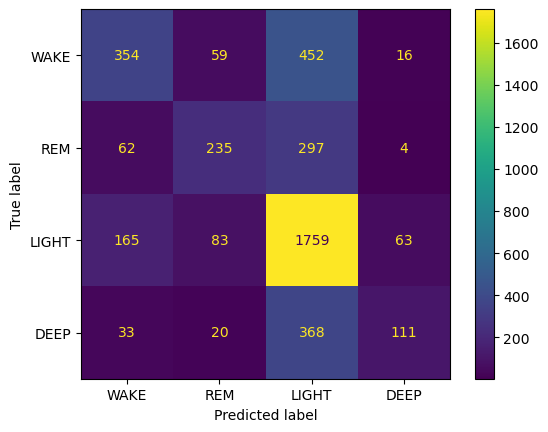

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['WAKE','REM','LIGHT','DEEP'])
disp.plot()
plt.show()